<a href="https://colab.research.google.com/github/allyssonendo/Soulcode-PANDAS/blob/main/PANDAS_Aula01(atividade_Cenipa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação de bibliotecas


In [63]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Declaração das Libs

In [65]:
import pandas as pd
import pandera as pa
import numpy as np
import os
from google.cloud import storage

##Config do Pandas

In [66]:
pd.set_option('display.max_columns',100)

##Conector para Cloud Storage (Bucket)


In [67]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)
#Carrega o token para o ambiente de serviço
serviceAccount = '/content/erudite-store-377820-f099033ba55b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [68]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('allyssonendo01')
bucket.blob('ocorrenciass.csv')
path = 'gs://allyssonendo01/brutos/ocorrenciass.csv'

##Extração de dados


In [132]:
df = pd.read_csv(path,sep = ';', encoding = 'ISO-8859-1', parse_dates=['ocorrencia_dia'], dayfirst = True)

##Pré análise


In [70]:
#Visualização do arquivo
df

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,81029,81029,81029,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,81025,81025,81025,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [71]:
#Mostra a ultima linha do data frame 
#O numero a esquerda é o rotulo e não o indice
df.tail(1)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
6768,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,2010-01-03,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [72]:
#Mostra a primeira linha
df.head(1)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM


In [133]:
#Cria um mini data frame (filtro)
filtro = df.head(3)
filtro

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM


In [134]:
#Consulta dos tipos de dados dentro de cada coluna 
#Se a coluna possuir mais de um tipo de dados ele classificara como objeto
#o objeto pode ser manipulado como string
df.dtypes

codigo_ocorrencia                          int64
codigo_ocorrencia1                         int64
codigo_ocorrencia2                         int64
codigo_ocorrencia3                         int64
codigo_ocorrencia4                         int64
ocorrencia_classificacao                  object
ocorrencia_latitude                       object
ocorrencia_longitude                      object
ocorrencia_cidade                         object
ocorrencia_uf                             object
ocorrencia_pais                           object
ocorrencia_aerodromo                      object
ocorrencia_dia                    datetime64[ns]
ocorrencia_hora                           object
investigacao_aeronave_liberada            object
investigacao_status                       object
divulgacao_relatorio_numero               object
divulgacao_relatorio_publicado            object
divulgacao_dia_publicacao                 object
total_recomendacoes                        int64
total_aeronaves_envo

In [135]:
#Mostra de modo resumido o numero de linhas e de colunas
df.shape

(6769, 22)

In [136]:
#df.types com mais dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769 entries, 0 to 6768
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   codigo_ocorrencia               6769 non-null   int64         
 1   codigo_ocorrencia1              6769 non-null   int64         
 2   codigo_ocorrencia2              6769 non-null   int64         
 3   codigo_ocorrencia3              6769 non-null   int64         
 4   codigo_ocorrencia4              6769 non-null   int64         
 5   ocorrencia_classificacao        6769 non-null   object        
 6   ocorrencia_latitude             5135 non-null   object        
 7   ocorrencia_longitude            5135 non-null   object        
 8   ocorrencia_cidade               6769 non-null   object        
 9   ocorrencia_uf                   6769 non-null   object        
 10  ocorrencia_pais                 6769 non-null   object        
 11  ocor

In [137]:
#perdunta ao python se os valores de uma coluna são unicos
#colunas com valores unicos podem se tornar o novo rotulo
df.codigo_ocorrencia.is_unique

True

In [78]:
#transforma a coluna em um rotulo
#o novo rotulo não é mais uma coluna de valores e sim uma coluna de posição
df.set_index('codigo_ocorrencia',inplace = True)

In [79]:
#Resetar o rotulo(index) do dataframe
df.reset_index(inplace = True)

##Transformações


In [138]:
df

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,81029,81029,81029,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,81025,81025,81025,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [139]:
#cria um backup de df em dfback
dfback = df.copy()

In [140]:
#Drop de colunas identicas (codigo_ocorrencia1	codigo_ocorrencia2	codigo_ocorrencia3	codigo_ocorrencia4)
#O 0 são as linhas e 1 as colunas
df.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4'],axis = 1, inplace = True)

In [141]:
#Mais drops de colunas (ocorrencia_latitude','ocorrencia_longitude','investigacao_aeronave_liberada','investigacao_status',
#'divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao)
df.drop(['ocorrencia_latitude','ocorrencia_longitude','investigacao_aeronave_liberada','investigacao_status','divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao'],axis=1,inplace=True)

In [142]:
df.dtypes
#Troca de nome de colunas
df.rename(columns={'ocorrencia_classificacao':'classificacao','ocorrencia_cidade':'cidade','ocorrencia_uf':'uf', 'ocorrencia_pais':'pais'},inplace = True)
df.rename(columns={'ocorrencia_aerodromo':'aerodromo','ocorrencia_dia':'dia',	'ocorrencia_hora':'hora','total_aeronaves_envolvidas':'n_aeronaves','ocorrencia_saida_pista':'saida_pista'},inplace = True)
df

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


In [143]:
#Verificando incosistencias particulares
#sorted faz com que caracteres especiais apareçam primeiro
#pd.unique faz com que apareçam os resultados unicos
sorted(pd.unique(df['aerodromo']))

['***',
 '**NI',
 '5JTI',
 '9PAA',
 '9PBS',
 '9PFC',
 '9PFX',
 '9PHD',
 '9PSD',
 'APUA',
 'SBAE',
 'SBAN',
 'SBAQ',
 'SBAR',
 'SBAT',
 'SBAU',
 'SBAX',
 'SBBE',
 'SBBH',
 'SBBI',
 'SBBP',
 'SBBQ',
 'SBBR',
 'SBBU',
 'SBBV',
 'SBBW',
 'SBBZ',
 'SBCA',
 'SBCB',
 'SBCF',
 'SBCG',
 'SBCH',
 'SBCJ',
 'SBCP',
 'SBCR',
 'SBCT',
 'SBCX',
 'SBCY',
 'SBCZ',
 'SBDN',
 'SBEG',
 'SBEK',
 'SBFE',
 'SBFI',
 'SBFL',
 'SBFN',
 'SBFS',
 'SBFZ',
 'SBGL',
 'SBGO',
 'SBGP',
 'SBGR',
 'SBGV',
 'SBGW',
 'SBHT',
 'SBIH',
 'SBIL',
 'SBIP',
 'SBIT',
 'SBIZ',
 'SBJA',
 'SBJC',
 'SBJD',
 'SBJF',
 'SBJH',
 'SBJI',
 'SBJP',
 'SBJR',
 'SBJU',
 'SBJV',
 'SBKG',
 'SBKP',
 'SBLE',
 'SBLJ',
 'SBLO',
 'SBMA',
 'SBMD',
 'SBME',
 'SBMG',
 'SBMK',
 'SBML',
 'SBMO',
 'SBMQ',
 'SBMS',
 'SBMT',
 'SBMY',
 'SBNF',
 'SBNM',
 'SBNT',
 'SBNV',
 'SBPA',
 'SBPB',
 'SBPC',
 'SBPF',
 'SBPG',
 'SBPJ',
 'SBPK',
 'SBPL',
 'SBPN',
 'SBPO',
 'SBPP',
 'SBPR',
 'SBPS',
 'SBPV',
 'SBQV',
 'SBRB',
 'SBRD',
 'SBRF',
 'SBRJ',
 'SBRP',
 'SBSC',
 '

##Inconsistencias encontradas (coluna aerodromo)


In [87]:
'***','**NI'

('***', '**NI')

In [144]:
#Transforma os dados '***','**NI' em NA
df.replace(['***','**NI'],pd.NA,inplace = True)
df

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,<NA>,2010-01-04,17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,<NA>,2010-01-03,12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


In [145]:
#Transforma os dados NA em NaN
df.replace([pd.NA],np.NaN,inplace=True)
df

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,2010-01-04,17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,2010-01-03,12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


#Tratamento das datas

In [174]:
#Pegar a coluna data e converter para tipo string
df['dia'] = df['dia'].astype(str)

In [175]:
#Criar uma coluna para receber dia e horario
df['periodo'] = pd.to_datetime(df['dia']+' '+df['hora'])

In [178]:
#Dropando data e horario depois de juntar as 2 em uma nova coluna
df.drop(['dia','hora'],axis=1,inplace=True)

#Final tratamento datas

In [176]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
dia                            object
hora                           object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
periodo                datetime64[ns]
dtype: object

In [148]:
#Verificar dados Nulos, Ausentes, Etc...

df.isna().sum()


codigo_ocorrencia         0
classificacao             0
cidade                    0
uf                        4
pais                      0
aerodromo              2618
dia                       0
hora                      2
total_recomendacoes       0
n_aeronaves               0
saida_pista               0
dtype: int64

In [149]:
dfback.isna().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude               1634
ocorrencia_longitude              1634
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      2
investigacao_aeronave_liberada     238
investigacao_status                341
divulgacao_relatorio_numero        782
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4988
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [150]:
#Conta apenas dados preenchidos (não conta os valores nulos)
df.count()

codigo_ocorrencia      6769
classificacao          6769
cidade                 6769
uf                     6765
pais                   6769
aerodromo              4151
dia                    6769
hora                   6767
total_recomendacoes    6769
n_aeronaves            6769
saida_pista            6769
dtype: int64

##Criação do Schema de validação de dados

In [151]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
dia                    datetime64[ns]
hora                           object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
dtype: object

In [152]:
#Criação do schema pandera
#Checando as colunas (se possuem as caracateristicas pedidas)
#Se o primeiro digito vier 0 ou 1 o segundo sera de 0 a 9 [0-1]?[0-9] , ou caso seja 2 [2] o segundo digito ira de 0 a 3 [0-3]
#r (expressao regular) ^(onde começa) $(onde termina) ?(se na for isto | ou)  

#schema2 é validação usando a nova coluna periodo e sem as colunas dia e hora
schema = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia':pa.Column(pa.Int),
        'classificacao':pa.Column(pa.String),
        'cidade':pa.Column(pa.String),
        'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
        'pais':pa.Column(pa.String),
        'aerodromo':pa.Column(pa.String, pa.Check.str_length(4,4),nullable=True),
        'dia':pa.Column(pa.DateTime),
        'hora':pa.Column(pa.String,pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9]):([0-5][0-9])?$'),nullable=True),
        'total_recomendacoes':pa.Column(pa.Int),
        'n_aeronaves':pa.Column(pa.Int),
        'saida_pista':pa.Column(pa.String, pa.Check.str_length(3,3)),
    }
)
schema2 = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia':pa.Column(pa.Int),
        'classificacao':pa.Column(pa.String),
        'cidade':pa.Column(pa.String),
        'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
        'pais':pa.Column(pa.String),
        'aerodromo':pa.Column(pa.String,pa.Check.str_length(4,4),nullable=True),
        'total_recomendacoes':pa.Column(pa.Int),
        'n_aeronaves':pa.Column(pa.Int),
        'saida_pista':pa.Column(pa.String,pa.Check.str_length(3,3)),
        'periodo':pa.Column(pa.DateTime,nullable=True),
    }
)


In [177]:
schema2.validate(df)

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista,periodo
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM,2022-10-09 16:30:00
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO,2022-10-09 16:20:00
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM,2022-10-06 15:30:00
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO,2022-10-06 00:44:00
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO,2022-10-05 20:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO,2010-01-05 19:25:00
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,2010-01-04,17:30:00,0,1,NÃO,2010-01-04 17:30:00
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,2010-01-03,12:00:00,0,1,NÃO,2010-01-03 12:00:00
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO,2010-01-03 11:05:00


In [154]:
df.loc[[283,320,912,4541]]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
283,80665,ACIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,2022-04-22,20:00:00,0,1,NÃO
320,80631,INCIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,2022-04-04,11:15:00,0,1,NÃO
912,79956,ACIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,2021-02-26,11:00:00,0,1,NÃO
4541,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,NaN,BRASIL,NaN,2013-09-02,02:54:00,0,1,NÃO


In [155]:
#Qual posição voce quer procurar algo(precisa da posição da linha/rotulo) antes era SBSP e depois altera para teste
#replace seria para caso geral (onde trocaria todos dados do df)
df.loc[0,'aerodromo'] = 'TESTE'
df.head()
#Voltando ao que era antes
df.loc[0,'aerodromo'] = 'SBSP'
#Transforma toda a coluna aerodromo em TESTE
#df.loc[:,'aerodromo'] = 'TESTE'


In [156]:
#Busca avançada
df.loc[[0,1000,2000],['classificacao','uf']]

,classificacao,uf
0,INCIDENTE GRAVE,SP
1000,INCIDENTE GRAVE,RR
2000,INCIDENTE,PB


In [157]:
#Troca todos incidentes graves na coluna classificacao para teste
#df.loc[df.classificacao == 'INCIDENTE GRAVE',['classificacao']] = 'TESTE'

In [104]:
#Cria uma nova coluna que recebe os valores de aerodromo
#df['backaerodromo'] = df.aerodromo

In [158]:
df.dtypes


codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
dia                    datetime64[ns]
hora                           object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
dtype: object

In [159]:
#conversao de tipo de colunas
df['n_aeronaves'] = df['n_aeronaves'].astype('int')

In [160]:
df

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,2010-01-04,17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,2010-01-03,12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


##FILTROS


In [161]:
#marca as posiçoes de nulo e depois mostra onde elas estao
filtronulo = df.aerodromo.isna()
df.loc[filtronulo]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
5,81019,ACIDENTE,PORTO ALEGRE,RS,BRASIL,NaN,2022-10-03,20:50:00,0,1,NÃO
6,81022,INCIDENTE,LOBATO,PR,BRASIL,NaN,2022-10-03,15:38:00,0,1,NÃO
7,81021,ACIDENTE,NOVA BANDEIRANTES,MT,BRASIL,NaN,2022-10-02,19:00:00,0,1,SIM
8,81009,INCIDENTE GRAVE,NAVIRAÍ,MS,BRASIL,NaN,2022-10-01,10:10:00,0,1,SIM
9,81012,INCIDENTE,LINHARES,ES,BRASIL,NaN,2022-09-30,12:20:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6758,39789,INCIDENTE,SÃO PEDRO DO SUL,RS,BRASIL,NaN,2010-01-10,21:30:00,0,1,NÃO
6761,39707,INCIDENTE GRAVE,CANUTAMA,AM,BRASIL,NaN,2010-01-09,12:30:00,3,1,NÃO
6763,39807,INCIDENTE,SALVADOR,BA,BRASIL,NaN,2010-01-06,17:53:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,2010-01-04,17:30:00,0,1,NÃO


In [162]:
filtroincidente = df.classificacao =='INCIDENTE'
#dfacidente = df.loc[filtroacidente]
filtroincidente

0       False
1        True
2       False
3        True
4        True
        ...  
6764     True
6765    False
6766     True
6767     True
6768     True
Name: classificacao, Length: 6769, dtype: bool

In [163]:
#filtro com mais detalhes
ftcidade = df.cidade == 'SÃO PAULO'
ftpista = df.saida_pista  == 'SIM'
ft2021 = df.dia.dt.year == 2021
ftuf = df.uf == 'SP'

In [164]:
dfsp = df.loc[ftpista & ft2021 & ftuf]

In [165]:
df.loc[ftcidade & ftpista & ft2021 & ftuf]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
465,80456,INCIDENTE,SÃO PAULO,SP,BRASIL,SBSP,2021-12-30,13:15:00,0,1,SIM


In [166]:
#Filtro primeira quinzena de abril de tdos anos
ftabril = df.dia.dt.month == 4
ftquinz = (df.dia.dt.day > 0) & (df.dia.dt.day <16)
df.loc[ftabril & ftquinz]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
296,80648,INCIDENTE GRAVE,IBOTIRAMA,BA,BRASIL,SNIT,2022-04-15,14:25:00,0,1,SIM
297,80658,INCIDENTE,SÃO PAULO,SP,BRASIL,SBGR,2022-04-15,11:00:00,0,1,NÃO
298,80678,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2022-04-15,00:00:00,0,1,NÃO
299,80647,INCIDENTE GRAVE,RIO BRANCO,AC,BRASIL,SBRB,2022-04-14,17:45:00,0,1,NÃO
300,80653,ACIDENTE,MINEIROS,GO,BRASIL,NaN,2022-04-14,10:30:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6650,40251,INCIDENTE,FLORIANÓPOLIS,SC,BRASIL,NaN,2010-04-04,17:00:00,0,1,NÃO
6651,40267,INCIDENTE GRAVE,VERA CRUZ,BA,BRASIL,SNVR,2010-04-04,11:00:00,2,1,NÃO
6652,40291,INCIDENTE,CONFINS,MG,BRASIL,SBCF,2010-04-03,20:25:00,0,1,NÃO
6653,40275,INCIDENTE,BRASÍLIA,DF,BRASIL,SBBR,2010-04-02,18:15:00,0,1,NÃO


In [167]:
#Filtro de palavras com certas letras no final
filtrofinal = df.cidade.str[-3:] == 'RIO'
df.loc[filtrofinal]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
649,80256,INCIDENTE,CABO FRIO,RJ,BRASIL,SBCB,2021-08-21,15:10:00,0,1,NÃO
936,79894,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,NaN,2021-02-16,11:30:00,0,1,NÃO
940,79889,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,NaN,2021-02-12,13:00:00,0,1,SIM
952,79881,INCIDENTE GRAVE,CABO FRIO,RJ,BRASIL,SBCB,2021-02-05,21:00:00,0,1,NÃO
1211,79497,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,NaN,2020-08-20,18:20:00,2,1,NÃO
1278,79407,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,NaN,2020-06-20,16:30:00,0,1,NÃO
1499,79100,INCIDENTE GRAVE,LADÁRIO,MS,BRASIL,SSVA,2020-01-16,16:15:00,0,1,NÃO
1866,78799,INCIDENTE GRAVE,CABO FRIO,RJ,BRASIL,NaN,2019-04-18,21:09:00,2,2,NÃO
1940,78550,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,APUA,2019-02-23,11:05:00,1,1,NÃO
2178,78102,INCIDENTE GRAVE,OSÓRIO,RS,BRASIL,SSOS,2018-08-04,19:15:00,0,2,NÃO


In [168]:
#Filtro de palavras com certas letras no meio
filtrointerno = df.cidade.str.contains('BO|MA')
df.loc[filtrointerno]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
12,81014,ACIDENTE,BOA VISTA,RR,BRASIL,NaN,2022-09-27,00:00:00,0,1,NÃO
34,80969,INCIDENTE,MARABÁ,PA,BRASIL,SBMA,2022-09-10,17:45:00,0,1,NÃO
56,80938,INCIDENTE,MARABÁ,PA,BRASIL,SBMA,2022-08-29,NaN,0,1,NÃO
72,80947,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-08-20,08:13:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6690,39916,INCIDENTE GRAVE,MANAUS,AM,BRASIL,SBEG,2010-03-07,19:35:00,2,1,SIM
6733,39487,INCIDENTE GRAVE,PALMAS,TO,BRASIL,SBPJ,2010-01-26,16:50:00,0,1,NÃO
6750,39315,ACIDENTE,CANUTAMA,AM,BRASIL,NaN,2010-01-15,21:22:00,0,1,NÃO
6755,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,BRASIL,NaN,2010-01-11,17:00:00,2,1,NÃO


##GROUP BY

In [120]:
#Retorna quantidade que cada valor possui
df.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
INCIDENTE          3795
ACIDENTE           2090
INCIDENTE GRAVE     884
dtype: int64

In [121]:
#GroupBY mostrando os valores NaN
df.groupby(['aerodromo'],dropna=False).size().sort_values(ascending=False)

aerodromo
NaN     2618
SBGR     173
SBMT     150
SBKP     128
SBBH     124
        ... 
SJVL       1
SJTO       1
SJOD       1
SJNQ       1
SJNC       1
Length: 574, dtype: int64

In [122]:
#filtro sul e incidentes
filtrosul = df.uf.isin(['RS','PR','SC'])
dfsul = df.loc[filtroincidente & filtrosul]
dfsul
#dfsul.groupby(['uf']).size().sort_values(ascending=False)

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,dia,hora,total_recomendacoes,n_aeronaves,saida_pista,periodo
6,81022,INCIDENTE,LOBATO,PR,BRASIL,NaN,2022-10-03,15:38:00,0,1,NÃO,2022-10-03 15:38:00
22,80996,INCIDENTE,CAMPO LARGO,PR,BRASIL,NaN,2022-09-20,18:17:00,0,1,NÃO,2022-09-20 18:17:00
23,80994,INCIDENTE,CURITIBA,PR,BRASIL,SBCT,2022-09-19,18:40:00,0,1,NÃO,2022-09-19 18:40:00
26,81007,INCIDENTE,NÃO IDENTIFICADA,PR,BRASIL,NaN,2022-09-16,19:40:00,0,1,NÃO,2022-09-16 19:40:00
49,80963,INCIDENTE,CURITIBA,PR,BRASIL,SBCT,2022-09-02,23:03:00,0,1,NÃO,2022-09-02 23:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6724,39748,INCIDENTE,CAMBÉ,PR,BRASIL,NaN,2010-02-03,14:30:00,0,1,NÃO,2010-02-03 14:30:00
6730,39627,INCIDENTE,FLORIANÓPOLIS,SC,BRASIL,SBFL,2010-01-27,16:15:00,0,1,NÃO,2010-01-27 16:15:00
6745,39851,INCIDENTE,PASSO FUNDO,RS,BRASIL,SBPF,2010-01-19,03:00:00,0,1,NÃO,2010-01-19 03:00:00
6758,39789,INCIDENTE,SÃO PEDRO DO SUL,RS,BRASIL,NaN,2010-01-10,21:30:00,0,1,NÃO,2010-01-10 21:30:00


In [179]:
dfsp.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
ACIDENTE           7
INCIDENTE          3
INCIDENTE GRAVE    3
dtype: int64

<Axes: xlabel='ESTADO', ylabel='N. OCORRENCIAS'>

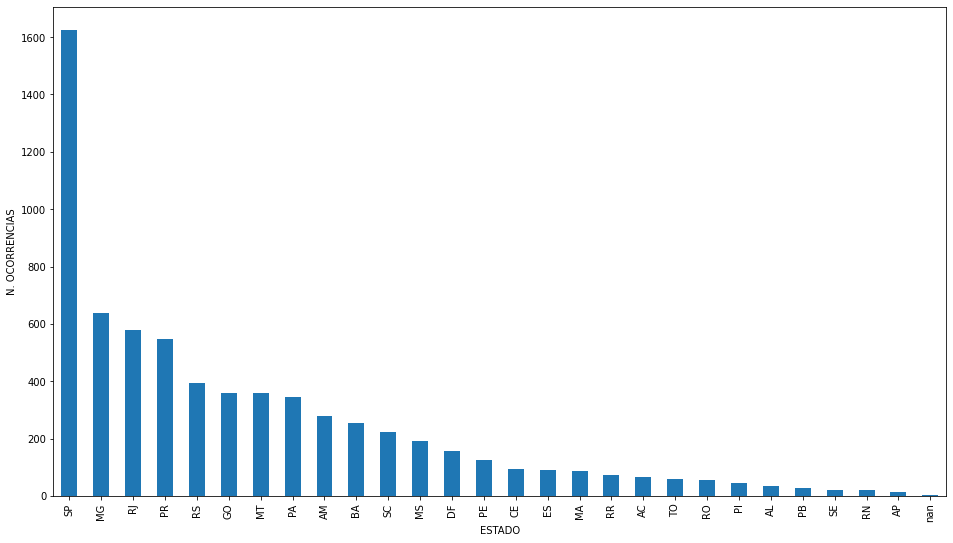

In [124]:
#Plota um grafico tipo barras
df.groupby(['uf'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(16,9),xlabel='ESTADO',ylabel='N. OCORRENCIAS')

##SALVAR O DF (LOAD)

In [125]:
#SE n alterar o rotulo padrao vc deve salvar o arquivo como index = false
#senão o index vai aparecer no csv como um dado
#Esse tipo de salvamento salva localmente no pasta do colab
df.to_csv('cenipa_tratado.csv',index = False)

In [180]:
#Enfia o csv no bucket
df.to_csv('gs://allyssonendo01/tratados/cenipa_tratado.csv',index = False)